# 결정트리

: 정보의 '균일성'이라는 룰을 기반으로 하는 쉽고 직관적인 알고리즘

## 설정하면 더 간단한 결정트리를 만드는 하이퍼 파라미터
- max_depth : 결정 트리의 최대 깊이
- min_samples_split : 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수
- min_samples_leaf : 리프 노드가 될 수 있는 샘플 데이터 건수의 최솟값

## 결정트리의 시각화

In [13]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier를 제공해 결정 트리 모델의 학습과 예측을 수행
dt_clf = DecisionTreeClassifier()

iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=100)

dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, \
                feature_names = iris_data.feature_names, impurity=True, filled=True)

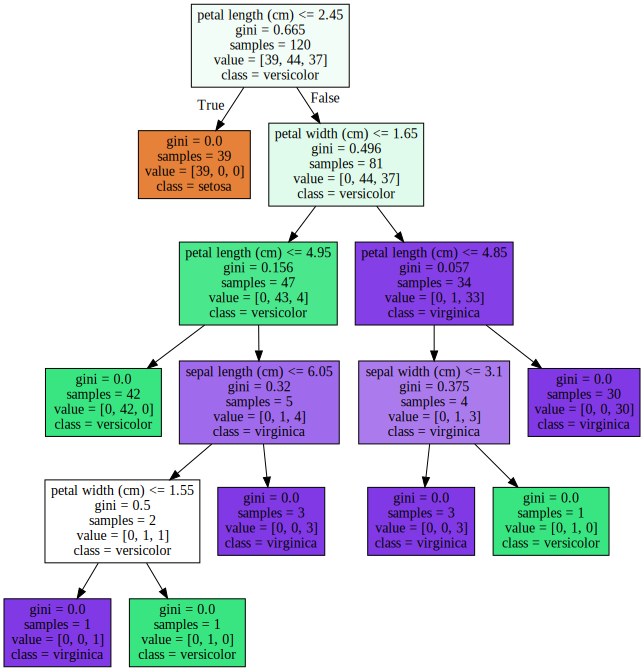

In [15]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

- 브랜치 노드 : 자식노드가 있는 노드, 자식노드를 만들기 위한 분할 규칙을 가지고 있음
- 리프 노드 : 자식노드가 없는 노드
    - 오직 하나의 클래스 값으로 최종 데이터가 구성
    - 리프 노드가 될 수 있는 하이퍼 파라미터 조건 충족

Feature importances:
[0.0075 0.0188 0.5734 0.4003]
sepal length (cm) : 0.0075
sepal width (cm) : 0.0188
petal length (cm) : 0.5734
petal width (cm) : 0.4003


<AxesSubplot:>

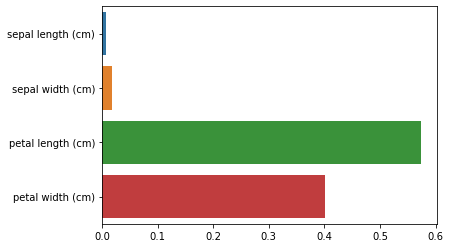

In [19]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances:")
print(np.round(dt_clf.feature_importances_,4))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print("{0} : {1:.4f}".format(name, value))
    
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

## 결정트리 과적합